### Análisis exploratorio de los datos

##### Librerias

In [6]:
import numpy as np 
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### Cargue de dataset

In [7]:
sns.set(style="whitegrid")
df = pd.read_csv("TMDB_movie_dataset_v11.csv")

print(df.shape)

(1360305, 24)


#### Separación de variables númericas y categóricas

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

print(num_cols)
print(cat_cols)


Index(['id', 'vote_average', 'vote_count', 'revenue', 'runtime', 'budget',
       'popularity'],
      dtype='object')
Index(['title', 'status', 'release_date', 'adult', 'backdrop_path', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords'],
      dtype='object')


In [9]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


#### Distribución de variables númericas

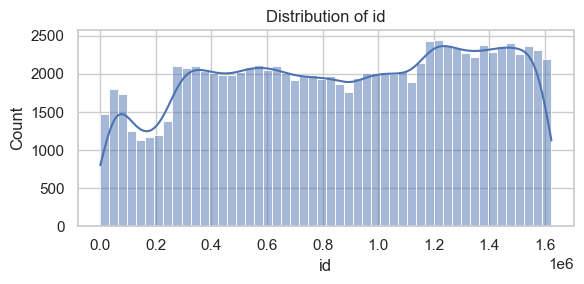

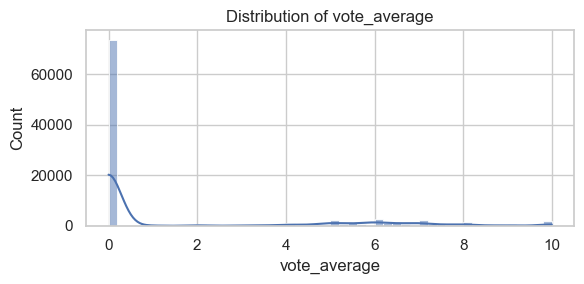

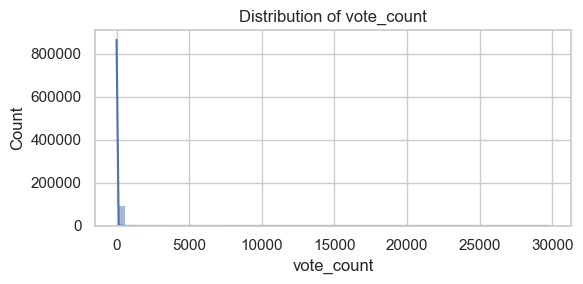

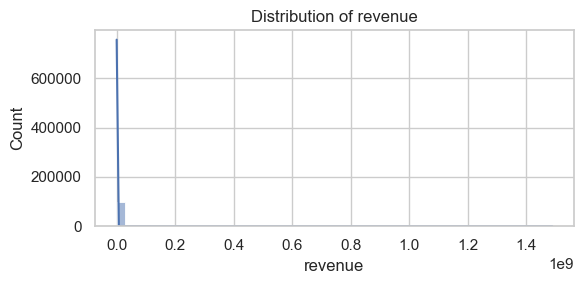

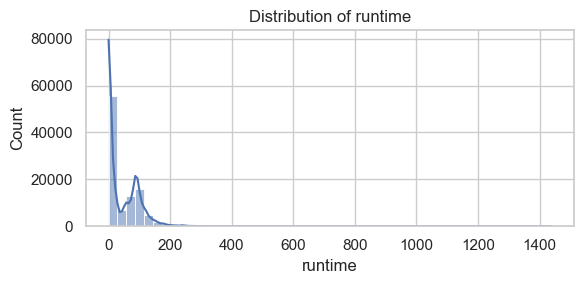

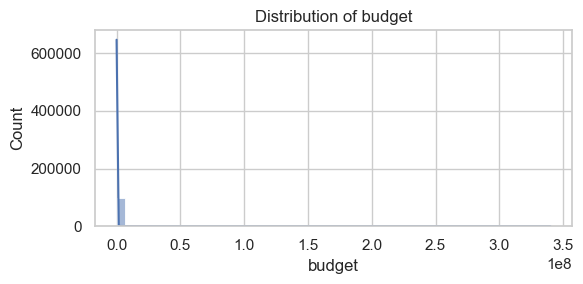

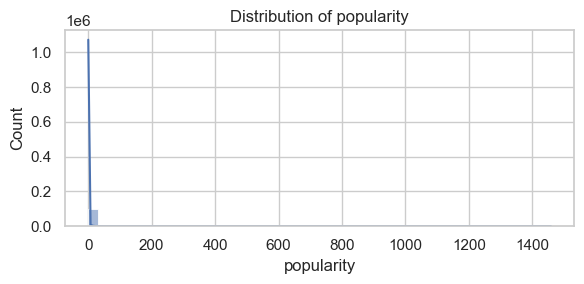

In [10]:
# -------------------------------
# NUMERIC DISTRIBUTIONS
# -------------------------------
for col in num_cols:
    if df[col].nunique() > 1:
        plt.figure(figsize=(6,3))
        sns.histplot(
            df[col].dropna().sample(min(100000, len(df))),
            bins=50,
            kde=True
        )
        plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.show()

In [11]:
df.head()
df.shape
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360305 entries, 0 to 1360304
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1360305 non-null  int64  
 1   title                 1360287 non-null  object 
 2   vote_average          1360305 non-null  float64
 3   vote_count            1360305 non-null  int64  
 4   status                1360305 non-null  object 
 5   release_date          1074103 non-null  object 
 6   revenue               1360305 non-null  int64  
 7   runtime               1360305 non-null  int64  
 8   adult                 1360305 non-null  bool   
 9   backdrop_path         342551 non-null   object 
 10  budget                1360305 non-null  int64  
 11  homepage              140602 non-null   object 
 12  imdb_id               654683 non-null   object 
 13  original_language     1360305 non-null  object 
 14  original_title        1360287 non-

#### Distribución de valores nulos

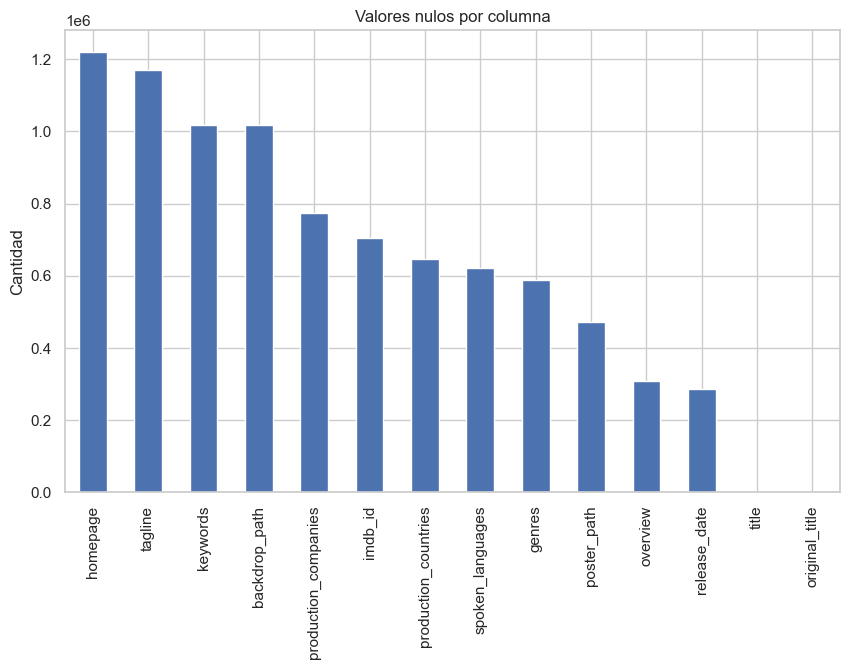

In [12]:
nulls = df.isnull().sum().sort_values(ascending=False)
nulls = nulls[nulls > 0]

plt.figure(figsize=(10,6))
nulls.plot(kind="bar")
plt.title("Valores nulos por columna")
plt.ylabel("Cantidad")
plt.show()


In [13]:
null_pct = (df.isnull().sum() / len(df)) * 100
null_pct.sort_values(ascending=False).head(10)


homepage                89.663936
tagline                 86.076799
keywords                74.872768
backdrop_path           74.818074
production_companies    56.921573
imdb_id                 51.872337
production_countries    47.619174
spoken_languages        45.761281
genres                  43.252138
poster_path             34.685824
dtype: float64

#### Descripción de variables categoricas

In [14]:
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
id,1360305.0,866535.635889,4.606654e+05,2.0,477460.0,882186.0,1272246.000,1.623658e+06
vote_average,1360305.0,1.612463,2.890197e+00,0.0,0.0,0.0,2.000,1.000000e+01
vote_count,1360305.0,15.772911,2.912337e+02,0.0,0.0,0.0,1.000,3.449500e+04
revenue,1360305.0,630831.503461,1.888052e+07,-12.0,0.0,0.0,0.000,5.000000e+09
runtime,1360305.0,44.687669,6.088659e+01,-28.0,0.0,17.0,86.000,1.440000e+04
budget,1360305.0,242537.651942,5.123548e+06,0.0,0.0,0.0,0.000,1.000000e+09
popularity,1360305.0,1.054439,6.948542e+00,0.0,0.6,0.6,0.755,2.994357e+03


In [15]:
df["popularity"]

0           83.9520
1          140.2410
2          130.6430
3           79.9320
4           98.0820
             ...   
1360300      0.6000
1360301      0.6110
1360302      1.5880
1360303      0.6000
1360304      0.0214
Name: popularity, Length: 1360305, dtype: float64

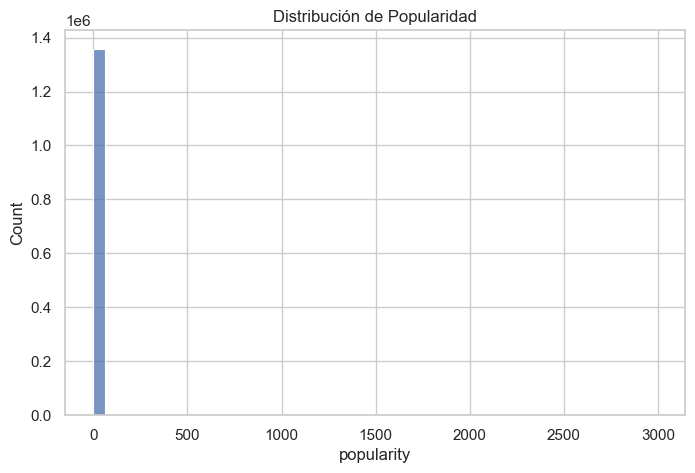

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df["popularity"], bins=50)
plt.title("Distribución de Popularidad")
plt.show()


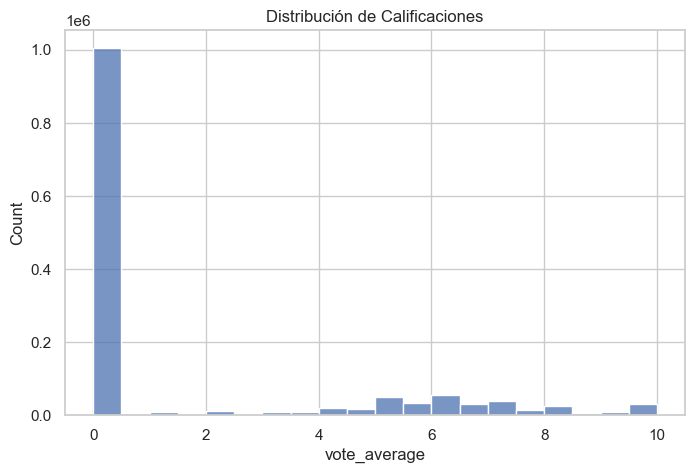

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df["vote_average"], bins=20)
plt.title("Distribución de Calificaciones")
plt.show()


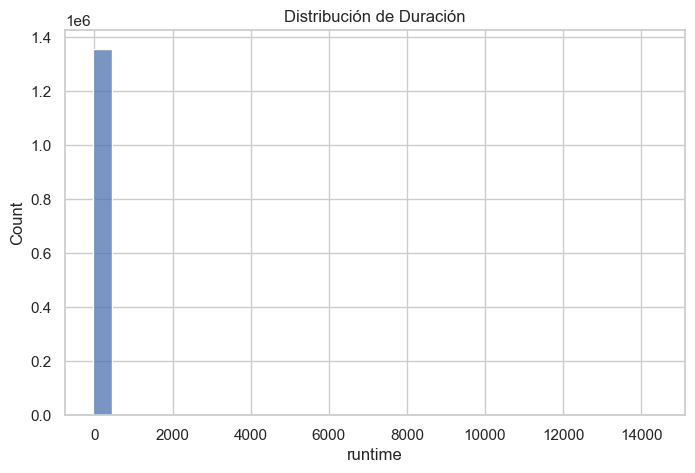

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df["runtime"], bins=30)
plt.title("Distribución de Duración")
plt.show()


#### Distribución de outliers

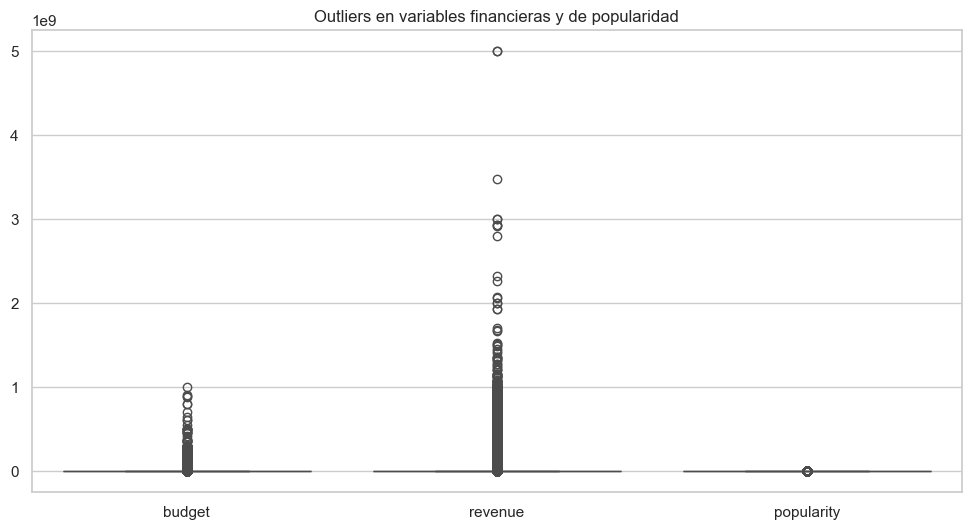

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["budget","revenue","popularity"]])
plt.title("Outliers en variables financieras y de popularidad")
plt.show()


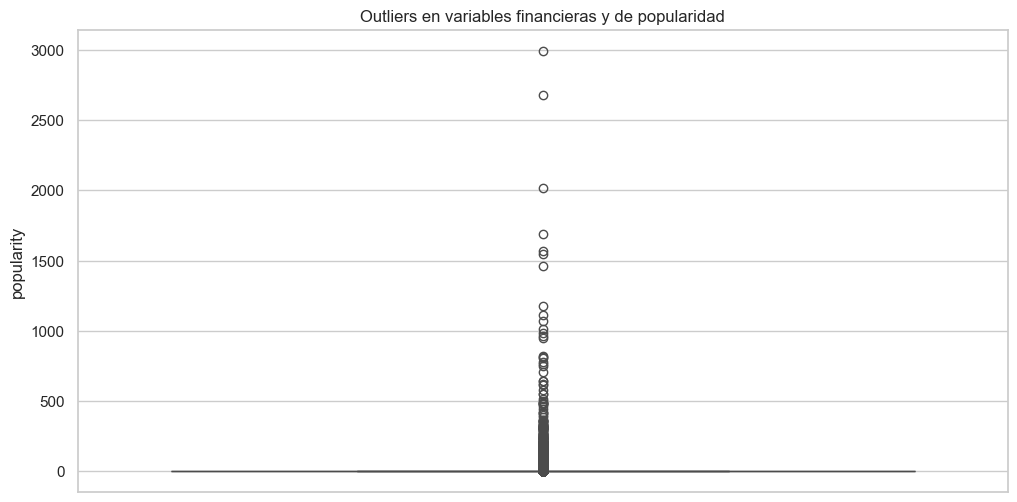

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df["popularity"])
plt.title("Outliers en variables financieras y de popularidad")
plt.show()

#### Distribución de variable estado

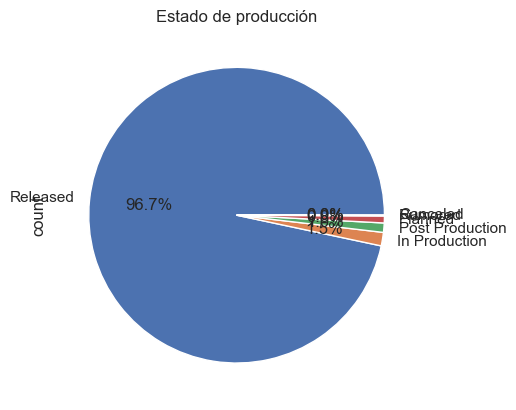

In [21]:
df["status"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Estado de producción")
plt.show()


#### Comportamiento de Popularidad vs Calificación

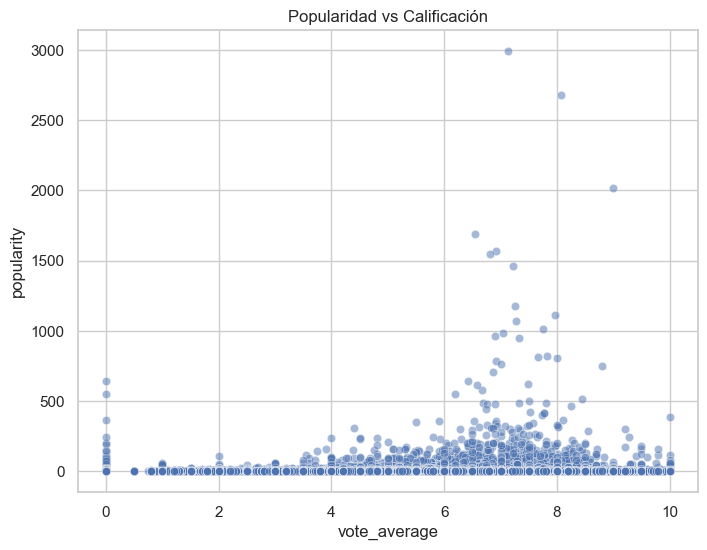

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,
                x="vote_average",
                y="popularity",
                alpha=0.5)

plt.title("Popularidad vs Calificación")
plt.show()


### --- Manejo de datos ---

##### Eliminar columnas con alta ausencia de datos y no relevantes para el modelo

In [23]:
cols_to_drop = ['homepage', 'tagline', 'backdrop_path', 'poster_path', 'imdb_id']
df.drop(columns=cols_to_drop, inplace=True)
print(f"Columnas eliminadas: {cols_to_drop}")
print(f"Shape tras eliminación: {df.shape}")

Columnas eliminadas: ['homepage', 'tagline', 'backdrop_path', 'poster_path', 'imdb_id']
Shape tras eliminación: (1360305, 19)


##### Filtrar solo películas con status "Released"

In [24]:
df = df[df['status'] == 'Released'].copy()
df.drop(columns=['status'], inplace=True)
print(f"Shape tras filtrar por status Released: {df.shape}")

Shape tras filtrar por status Released: (1315007, 18)


##### Eliminar filas sin título o título original 

In [25]:
df.dropna(subset=['title', 'original_title'], inplace=True)
print(f"Shape tras eliminar filas sin título: {df.shape}")

Shape tras eliminar filas sin título: (1314994, 18)


#### Limpiar variable runtime (valores negativos y atípicos extremos)

In [26]:
# Eliminar runtimes negativos o cero
df = df[df['runtime'] > 0]

# Eliminar outliers extremos 
df = df[(df['runtime'] >= 30) & (df['runtime'] <= 600)]

print(f"Shape tras limpiar runtime: {df.shape}")
print(df['runtime'].describe())

Shape tras limpiar runtime: (591012, 18)
count    591012.000000
mean         93.813242
std          43.369590
min          30.000000
25%          70.000000
50%          90.000000
75%         107.000000
max         600.000000
Name: runtime, dtype: float64


#### Limpiar budget y revenue (reemplazar ceros por NaN — son datos faltantes disfrazados)

In [28]:
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)
print(df[['budget', 'revenue']].describe())

             budget       revenue
count  3.179500e+04  1.765000e+04
mean   9.232083e+06  4.347183e+07
std    2.690720e+07  1.338935e+08
min    1.000000e+00  1.000000e+00
25%    1.000000e+04  2.200000e+05
50%    4.087500e+05  3.602429e+06
75%    5.075786e+06  2.534586e+07
max    8.880000e+08  3.000000e+09


#### Tratar nulos en variables textuales clave (genres, keywords)

In [29]:
text_cols = ['genres', 'keywords', 'overview', 'production_companies',
             'production_countries', 'spoken_languages']

for col in text_cols:
    df[col] = df[col].fillna('')

print("Nulos en columnas textuales tras imputación:")
print(df[text_cols].isnull().sum())

Nulos en columnas textuales tras imputación:
genres                  0
keywords                0
overview                0
production_companies    0
production_countries    0
spoken_languages        0
dtype: int64


#### Tratar popularity — valores extremos 

In [30]:
# Winsorizar al percentil 99 para reducir el impacto de outliers extremos
p99 = df['popularity'].quantile(0.99)
df['popularity'] = df['popularity'].clip(upper=p99)
print(f"Popularidad máxima tras winsorización: {df['popularity'].max():.2f}")

Popularidad máxima tras winsorización: 17.58


#### Eliminar duplicados

In [31]:
df.drop_duplicates(subset=['title', 'release_date'], inplace=True)
print(f"Shape final tras eliminar duplicados: {df.shape}")

Shape final tras eliminar duplicados: (588951, 18)


####  Resetear índice y verificación final

In [32]:
df.reset_index(drop=True, inplace=True)

print("\n--- RESUMEN FINAL ---")
print(f"Shape final: {df.shape}")
print(f"\nNulos por columna:\n{df.isnull().sum()[df.isnull().sum() > 0]}")
print(f"\nTipos de datos:\n{df.dtypes}")


--- RESUMEN FINAL ---
Shape final: (588951, 18)

Nulos por columna:
release_date     48730
revenue         571361
budget          557363
dtype: int64

Tipos de datos:
id                        int64
title                    object
vote_average            float64
vote_count                int64
release_date             object
revenue                 float64
runtime                   int64
adult                      bool
budget                  float64
original_language        object
original_title           object
overview                 object
popularity              float64
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object


## --- creacion de datos sinteticos ---

####  Extraer el vocabulario real de géneros del dataset

In [33]:
# Los géneros en TMDB vienen como strings tipo "Action Comedy Drama"
# Primero extraemos todos los géneros únicos reales

all_genres = set()
for g in df['genres'].dropna():
    for genre in g.split():
        if genre.strip():
            all_genres.add(genre.strip())

all_genres = list(all_genres)
print(f"Géneros únicos encontrados: {len(all_genres)}")
print(all_genres)

Géneros únicos encontrados: 40
['Fantasy,', 'Animation,', 'Family,', 'Mystery,', 'History,', 'Movie,', 'Fiction,', 'Comedy', 'Family', 'Horror', 'Science', 'Comedy,', 'Drama,', 'Documentary', 'Action,', 'Mystery', 'Western', 'Action', 'Western,', 'Documentary,', 'Music', 'War', 'Crime', 'Fiction', 'Thriller,', 'Crime,', 'Music,', 'Romance', 'War,', 'Animation', 'TV', 'Drama', 'Fantasy', 'Adventure,', 'History', 'Adventure', 'Thriller', 'Romance,', 'Horror,', 'Movie']


#### Crear usuarios sintéticos

In [34]:
import random

random.seed(42)
np.random.seed(42)

NUM_USERS = 10000
movie_ids = df['id'].tolist()

def generate_user(user_id):
    # Géneros favoritos: entre 2 y 5
    fav_genres = random.sample(all_genres, k=random.randint(2, 5))
    
    # Historial de películas calificadas: entre 5 y 30 películas
    n_rated = random.randint(5, 30)
    rated_movies = random.sample(movie_ids, k=n_rated)
    
    # Calificaciones del usuario: entre 1.0 y 5.0 (escala propia del sistema)
    ratings = {mid: round(random.uniform(1.0, 5.0), 1) for mid in rated_movies}
    
    # Historial de visualización sin calificación: entre 10 y 50 películas
    n_watched = random.randint(10, 50)
    # Evitamos que coincidan exactamente con las calificadas
    watched_pool = [m for m in movie_ids if m not in rated_movies]
    watched_movies = random.sample(watched_pool, k=n_watched)
    
    return {
        'user_id': user_id,
        'favorite_genres': fav_genres,
        'rated_movies': ratings,       # dict {movie_id: rating}
        'watched_movies': watched_movies  # lista de ids
    }

users = [generate_user(f"user_{i:04d}") for i in range(1, NUM_USERS + 1)]
print(f"Usuarios generados: {len(users)}")
print("\nEjemplo de usuario:")
print(users[0])

Usuarios generados: 10000

Ejemplo de usuario:
{'user_id': 'user_0001', 'favorite_genres': ['Animation,', 'Action'], 'rated_movies': {249305: 3.4, 182487: 3.2, 313802: 3.9, 866699: 3.8, 798152: 2.7, 287047: 2.8, 381002: 2.1, 47737: 4.5, 471048: 4.0, 292941: 1.6, 392176: 2.7, 1071630: 2.1}, 'watched_movies': [1399957, 133509, 157202, 490452, 507574, 1434838, 1354220, 1156566, 145327, 462175, 756325, 391429, 516151, 37955, 831408, 1182019, 563403, 614703, 153348, 89086, 412360, 1188760, 62721]}


#### Convertir a DataFrames estructurados

In [35]:
# --- Tabla 1: Perfil base del usuario ---
df_users = pd.DataFrame([{
    'user_id': u['user_id'],
    'favorite_genres': ', '.join(u['favorite_genres'])
} for u in users])

# --- Tabla 2: Ratings (una fila por película calificada) ---
ratings_rows = []
for u in users:
    for movie_id, rating in u['rated_movies'].items():
        ratings_rows.append({
            'user_id': u['user_id'],
            'movie_id': movie_id,
            'user_rating': rating
        })

df_ratings = pd.DataFrame(ratings_rows)

# --- Tabla 3: Historial de visualización ---
watched_rows = []
for u in users:
    for movie_id in u['watched_movies']:
        watched_rows.append({
            'user_id': u['user_id'],
            'movie_id': movie_id
        })

df_watched = pd.DataFrame(watched_rows)

print(f"df_users shape:   {df_users.shape}")
print(f"df_ratings shape: {df_ratings.shape}")
print(f"df_watched shape: {df_watched.shape}")

df_users shape:   (10000, 2)
df_ratings shape: (175531, 3)
df_watched shape: (299569, 2)


#### Verificación de coherencia

In [36]:
# Verificar que todos los movie_ids existen en el dataset real
ids_en_df = set(df['id'])

ids_ratings = set(df_ratings['movie_id'])
ids_watched = set(df_watched['movie_id'])

print(f"IDs de ratings no encontrados en df: {len(ids_ratings - ids_en_df)}")
print(f"IDs de watched no encontrados en df: {len(ids_watched - ids_en_df)}")

# Distribución de ratings
print("\nDistribución de calificaciones de usuarios:")
print(df_ratings['user_rating'].describe())

# Películas más calificadas
print("\nTop 10 películas más calificadas sintéticamente:")
print(df_ratings['movie_id'].value_counts().head(10))

IDs de ratings no encontrados en df: 0
IDs de watched no encontrados en df: 0

Distribución de calificaciones de usuarios:
count    175531.000000
mean          3.001011
std           1.156439
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: user_rating, dtype: float64

Top 10 películas más calificadas sintéticamente:
movie_id
720681     5
1134865    5
1456560    5
39598      5
1261761    5
539994     5
847736     5
1339407    5
1167892    5
49448      4
Name: count, dtype: int64


In [37]:
rows = []

for u in users:
    fav_genres_str = ', '.join(u['favorite_genres'])
    
    # Películas calificadas
    for movie_id, rating in u['rated_movies'].items():
        rows.append({
            'user_id': u['user_id'],
            'favorite_genres': fav_genres_str,
            'movie_id': movie_id,
            'user_rating': rating,
            'interaction_type': 'rated'
        })
    
    # Películas solo vistas
    for movie_id in u['watched_movies']:
        rows.append({
            'user_id': u['user_id'],
            'favorite_genres': fav_genres_str,
            'movie_id': movie_id,
            'user_rating': np.nan,  # No calificó
            'interaction_type': 'watched'
        })

df_interactions = pd.DataFrame(rows)
print(f"Shape interacciones: {df_interactions.shape}")

Shape interacciones: (475100, 5)


In [38]:
df_model = df_interactions.merge(
    df[['id', 'title', 'genres', 'keywords', 'overview',
        'vote_average', 'vote_count', 'popularity',
        'release_date', 'runtime', 'original_language',
        'production_countries', 'spoken_languages']],
    left_on='movie_id',
    right_on='id',
    how='left'
).drop(columns='id')

print(f"Shape final: {df_model.shape}")
print(df_model.head(3))

Shape final: (475254, 17)
     user_id     favorite_genres  movie_id  user_rating interaction_type  \
0  user_0001  Animation,, Action    249305          3.4            rated   
1  user_0001  Animation,, Action    182487          3.2            rated   
2  user_0001  Animation,, Action    313802          3.9            rated   

                    title             genres        keywords  \
0         Never Look Back              Drama                   
1  To Find and Neutralize  Action, Adventure                   
2                 Ostende     Mystery, Drama  woman director   

                                            overview  vote_average  \
0  A female lawyer hears a knock on her door one ...           6.0   
1  Fyodor hasn't been in homeland for 10 years. A...           4.7   
2  Waiting alone for her boyfriend at a hotel, a ...           5.6   

   vote_count  popularity release_date  runtime original_language  \
0           1       0.673   1952-01-01       73               

In [39]:
print("--- VERIFICACIÓN ---")
print(f"\nShape: {df_model.shape}")
print(f"\nColumnas: {df_model.columns.tolist()}")
print(f"\nNulos por columna:\n{df_model.isnull().sum()}")
print(f"\nTipos:\n{df_model.dtypes}")
print(f"\nInteracciones por tipo:\n{df_model['interaction_type'].value_counts()}")
print(f"\nEjemplo de fila:")
print(df_model.iloc[0])

--- VERIFICACIÓN ---

Shape: (475254, 17)

Columnas: ['user_id', 'favorite_genres', 'movie_id', 'user_rating', 'interaction_type', 'title', 'genres', 'keywords', 'overview', 'vote_average', 'vote_count', 'popularity', 'release_date', 'runtime', 'original_language', 'production_countries', 'spoken_languages']

Nulos por columna:
user_id                      0
favorite_genres              0
movie_id                     0
user_rating             299650
interaction_type             0
title                        0
genres                       0
keywords                     0
overview                     0
vote_average                 0
vote_count                   0
popularity                   0
release_date             39655
runtime                      0
original_language            0
production_countries         0
spoken_languages             0
dtype: int64

Tipos:
user_id                  object
favorite_genres          object
movie_id                  int64
user_rating             fl

In [40]:
df_model

,user_id,favorite_genres,movie_id,user_rating,interaction_type,title,genres,keywords,overview,vote_average,vote_count,popularity,release_date,runtime,original_language,production_countries,spoken_languages
0,user_0001,"Animation,, Action",249305,3.4,rated,Never Look Back,Drama,,A female lawyer hears a knock on her door one ...,6.0,1,0.6730,1952-01-01,73,en,,English
1,user_0001,"Animation,, Action",182487,3.2,rated,To Find and Neutralize,"Action, Adventure",,Fyodor hasn't been in homeland for 10 years. A...,4.7,3,0.7350,1982-12-06,87,ru,Soviet Union,Russian
2,user_0001,"Animation,, Action",313802,3.9,rated,Ostende,"Mystery, Drama",woman director,"Waiting alone for her boyfriend at a hotel, a ...",5.6,5,0.7430,2011-04-01,85,es,Argentina,Spanish
3,user_0001,"Animation,, Action",866699,3.8,rated,Heroine Cruelty Story X,,"gore, schoolgirl, heroine, cosplay",,0.0,0,1.0920,2008-10-10,72,ja,Japan,Japanese
4,user_0001,"Animation,, Action",798152,2.7,rated,Lust Life Love,"Drama, Romance",,A star-crossed love story set in the world of ...,3.7,6,3.0730,2021-02-10,99,en,United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475249,user_10000,"Horror, Action,",1561998,NaN,watched,Swamp Harvest,Documentary,,Film about the exploitation and cultivation of...,0.0,0,0.0071,1958-01-22,46,en,,Dutch
475250,user_10000,"Horror, Action,",337835,NaN,watched,On the Border,"Western, Drama, Family",german shepherd,A Mexico/United States border patrol officer i...,0.0,0,0.6000,1930-03-14,46,en,United States of America,English
475251,user_10000,"Horror, Action,",873670,NaN,watched,Will I Be Single Forever?,Romance,,36-year-old bachelorette Mami achieved success...,6.5,2,1.2980,2021-11-19,94,ja,Japan,Japanese
475252,user_10000,"Horror, Action,",1011058,NaN,watched,Loving Brent Corrigan,,"anal sex, gay pornography, muscled men",All of your fantasies about Loving Brent Corri...,0.0,0,0.6000,2018-06-08,157,en,United States of America,English


## 📋 Explicación columna a columna — DataFrame final

---

#### 🧑 Columnas del usuario (sintéticas)

**`user_id`** — Identificador único de cada usuario simulado. Formato `user_0001`, `user_0002`, etc.

**`favorite_genres`** — Géneros favoritos del usuario. Ejemplo: `"Action, Comedy, Drama"`. En un sistema real vendría de una encuesta inicial o del comportamiento histórico.

**`interaction_type`** — Cómo interactuó el usuario con la película: `rated` si la vio y calificó, `watched` si solo la vio sin dejar opinión.

**`user_rating`** — Calificación del usuario en escala 1.0 a 5.0. Vale `NaN` cuando `interaction_type` es `watched`.

---

#### 🎬 Columnas de la película (dataset TMDB)

**`movie_id`** — Identificador único de la película en TMDB. Puente entre la interacción del usuario y la info de la película.

**`title`** — Nombre oficial de la película. Columna principal para presentar resultados al usuario.

**`original_title`** — Título en el idioma original de producción.

**`genres`** — Géneros cinematográficos: `Action Drama Thriller`. Clave para comparar con `favorite_genres` del usuario.

**`keywords`** — Palabras clave temáticas como `revenge friendship dystopia`. Capturan matices que los géneros no expresan.

**`overview`** — Sinopsis de la película. Campo más rico semánticamente, ideal para TF-IDF o embeddings.

**`vote_average`** — Calificación promedio en TMDB (escala 0–10). Señal de calidad percibida por la comunidad.

**`vote_count`** — Total de votos recibidos. Debe leerse junto a `vote_average` para evaluar confiabilidad.

**`popularity`** — Métrica de tendencia de TMDB. Ya winsorizada al percentil 99 en la etapa de limpieza.

**`release_date`** — Fecha de estreno. Útil para filtrar por época o dar más peso a contenido reciente.

**`runtime`** — Duración en minutos. Útil como filtro según preferencia del usuario.

**`original_language`** — Idioma original de producción. Permite personalizar por preferencia de idioma.

**`production_countries`** — Países de producción. Útil para recomendaciones regionales.

**`spoken_languages`** — Idiomas hablados en la película. Complementa `original_language`.

---

#### 📊 Rol de cada columna en el modelo

| Columna | Rol |
|---|---|
| `user_id`, `favorite_genres` | 🧑 Perfil del usuario |
| `interaction_type`, `user_rating` | ⭐ Señal de preferencia |
| `genres`, `keywords`, `overview` | 🔍 Vectorización de contenido |
| `vote_average`, `vote_count`, `popularity` | 📈 Calidad y relevancia |
| `release_date`, `runtime`, `original_language` | 🎛️ Filtros contextuales |
| `production_countries`, `spoken_languages` | 🌍 Contexto descriptivo |